In [251]:
'''
Archivo en GitHub: https://github.com/davidlealo/diplomadodatascienceuc2023/blob/main/primer_taller/entrega_taller_uno.ipynb

El archivo que se encuentra en el siguiente enlace es el que se encuentra en el repositorio de GitHub es FALLIDO:
https://github.com/davidlealo/diplomadodatascienceuc2023/blob/main/primer_taller/entrega.ipynb

'''

'\nArchivo en GitHub: https://github.com/davidlealo/diplomadodatascienceuc2023/blob/main/primer_taller/entrega_taller_uno.ipynb\n\nEl archivo que se encuentra en el siguiente enlace es el que se encuentra en el repositorio de GitHub es FALLIDO:\nhttps://github.com/davidlealo/diplomadodatascienceuc2023/blob/main/primer_taller/entrega.ipynb\n\n'

# Pregunta 1
Cargue la base de datos bike.csv. Realice las siguientes procesos de limpieza

Transforme a factor las variables categóricas.
Transforme las variables temp y atemp a grados celsius, ya que se encuentran en escala normalizada. Use las siguientes fórmulas respectivamente:
(47*temp-8).
(66*atemp-16).
Transforme la variable humedad a porcentaje (multiplique la variable por 100).
Transforme la velocidad del viento a millas por hora (multiplique por 67 el valor de la variable normalizada).

In [252]:
# Importar pandas
import pandas as pd

In [253]:
# Cargar base de datos bike.csv en la variable data_bikes
data_bikes = pd.read_csv('data/bikes.csv')

In [254]:
print('Shape')
data_bikes.shape

Shape


(731, 14)

In [255]:
# Análisis iniciales del df
print('__________')
print('Info')
data_bikes.info()

__________
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        731 non-null    object 
 1   season      731 non-null    int64  
 2   year        731 non-null    int64  
 3   month       731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weather     731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  humidity    731 non-null    float64
 11  windspeed   731 non-null    float64
 12  registered  731 non-null    int64  
 13  Target      731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [256]:
# Transforme a factor las variables categóricas.
categorical_vars = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']
for var in categorical_vars:
    data_bikes[var] = data_bikes[var].astype('category')


In [257]:
data_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   date        731 non-null    object  
 1   season      731 non-null    category
 2   year        731 non-null    category
 3   month       731 non-null    category
 4   holiday     731 non-null    category
 5   weekday     731 non-null    category
 6   workingday  731 non-null    category
 7   weather     731 non-null    category
 8   temp        731 non-null    float64 
 9   atemp       731 non-null    float64 
 10  humidity    731 non-null    float64 
 11  windspeed   731 non-null    float64 
 12  registered  731 non-null    int64   
 13  Target      731 non-null    int64   
dtypes: category(7), float64(4), int64(2), object(1)
memory usage: 46.5+ KB


In [258]:
# Cambiar a fecha variable 'date' a formato datetime año-mes-día
data_bikes['date'] = pd.to_datetime(data_bikes['date'], format='%Y-%m-%d')

In [259]:
# Nuevo info con data como fecha
data_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  registered  731 non-null    int64         
 13  Target      731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(2)
memory usage: 46.5 KB


In [260]:
# Transforme las variables temp y atemp a grados celsius, ya que se encuentran en escala normalizada
data_bikes['temp'] = 47 * data_bikes['temp'] -8 #Transformación temperatura
data_bikes['atemp'] = 66 * data_bikes['atemp'] -16 #Transformación sensación térmica

In [261]:
# Transforme la variable humedad a porcentaje (multiplique la variable por 100)
data_bikes['humidity'] = data_bikes['humidity'] * 100

In [262]:
# Transforme la velocidad del viento a millas por hora 
# (multiplique por 67 el valor de la variable normalizada)
data_bikes['windspeed'] = data_bikes['windspeed'] * 67

# Pregunta 2
Realice un gráfico del número de arriendos de bicicletas vs temperatura, además, añada una curva de regresión lineal. ¿Cuál es la relación entre el número de arriendos con la temperatura?



In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

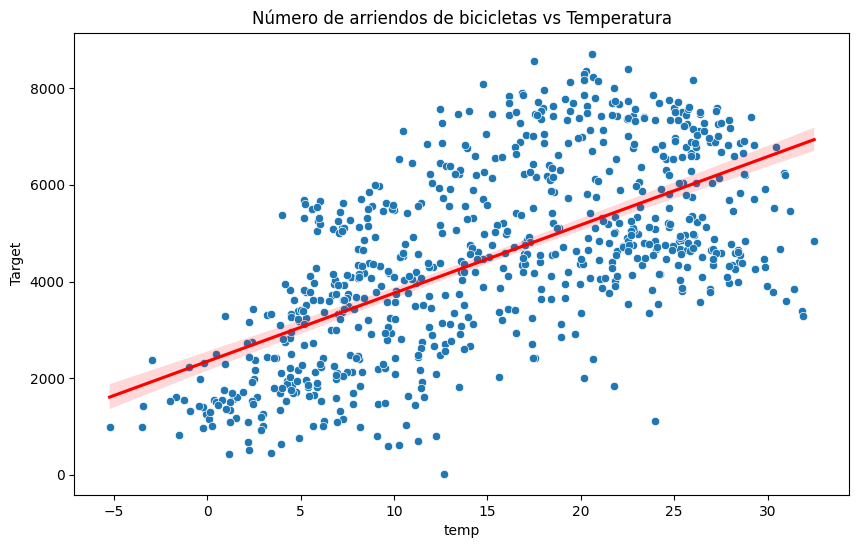

In [264]:
# Realizar el gráfico según las instrucciones 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_bikes, x='temp', y='Target')
sns.regplot(data=data_bikes, x='temp', y='Target', scatter=False, color='red')  # Curva de regresión lineal
plt.title("Número de arriendos de bicicletas vs Temperatura")
plt.show()

### ¿Cuál es la relación entre el número de arriendos con la temperatura? ###
Al aumentar la temperatura, también aumenta la cantidad de arriendos. La curva de regresión lineal demuestra que existe esa tendencia entre el aumento de temperatura y arriendos de bicicletas. Encontrando una mayor incertidumbre en los extremos de menor o mayor temperatura, lo que parece creíble ante la experiencia que con menos de 5 grados o más de 30 las personas pueden tener menos ganas de salir a andar en bicicleta 

# Pregunta 3
¿Es la relación entre la temperatura y el número de bicicletas arrendas igual en los dos años?, realice en un mismo gráfico la relación entre el número de arriendo vs temperatura para los dos años, añada las curvas de regresión lineal.

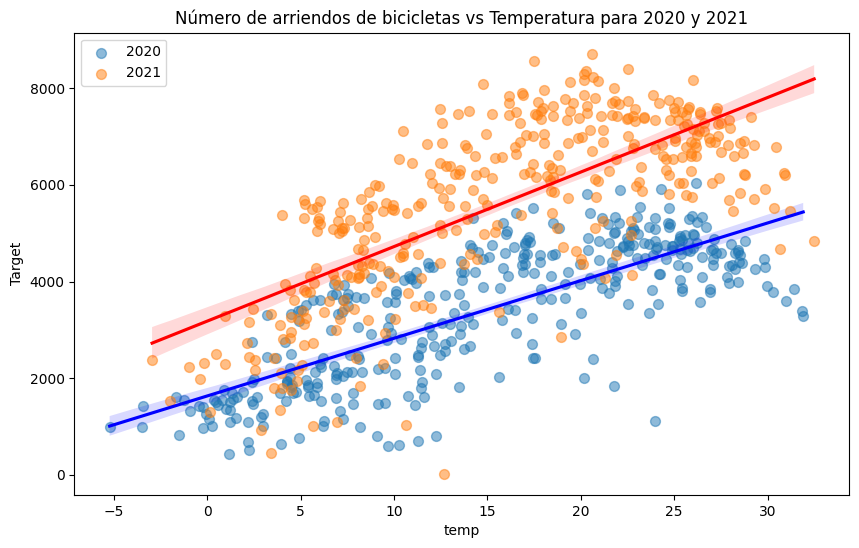

In [265]:
plt.figure(figsize=(10, 6))

# Gráfica para el año 2020
sns.regplot(data=data_bikes[data_bikes['year'] == 0], x='temp', y='Target', label='2020', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'blue'})

# Gráfica para el año 2021
sns.regplot(data=data_bikes[data_bikes['year'] == 1], x='temp', y='Target', label='2021', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'}, scatter=True)

plt.title("Número de arriendos de bicicletas vs Temperatura para 2020 y 2021")
plt.legend()
plt.show()

In [266]:
import statsmodels.api as sm

# Separar los datos por año
data_2020 = data_bikes[data_bikes['year'] == 0]
data_2021 = data_bikes[data_bikes['year'] == 1]

# Ajustar la regresión lineal para 2020
X_2020 = sm.add_constant(data_2020['temp'])  # Añadir una constante para el término de intercepción
model_2020 = sm.OLS(data_2020['Target'], X_2020).fit()

# Ajustar la regresión lineal para 2021
X_2021 = sm.add_constant(data_2021['temp'])
model_2021 = sm.OLS(data_2021['Target'], X_2021).fit()

# Imprimir los coeficientes (pendientes) para cada año
print("Coeficiente (pendiente) para 2020:", model_2020.params['temp'])
print("Coeficiente (pendiente) para 2021:", model_2021.params['temp'])


Coeficiente (pendiente) para 2020: 119.32616881805956
Coeficiente (pendiente) para 2021: 154.246382971884


### ¿Es la relación entre la temperatura y el número de bicicletas arrendas igual en los dos años? ###
Existe una relación similar en la relación entre el aumento de la temperatura con el de las bicicletas: a mayor temperatura, mayor cantidad de arriendos.
Pero el año 2021 por cada grado celsius de aumento, la cantidad de arriendos es mayor que el 2020, esto lo podemos encontrar por sus pendientes: 

> Coeficiente (pendiente) para 2020: 119.32616881805956

> Coeficiente (pendiente) para 2021: 154.246382971884

Esto indica que aunque la tendencia es al alza en ambos años, el 2021 es mayor

# Pregunta 4
Por selección forward, construya un modelo sin considerar las variables

date
month
registered
Interpreta el factor asociado a la Temperatura y días feriados.

In [267]:
# Primero, necesitamos descartar las variables (date, month, registered)
data_bikes = data_bikes.drop(columns=['date', 'month', 'registered'])

In [268]:
# Variables disponibles para el modelo
variables = data_bikes.columns.tolist()
target = 'Target'
variables.remove(target)

selected_variables = []  # Aquí almacenamos las variables seleccionadas
best_score = 1e20  # Inicializamos el score con un valor alto

for i in range(len(variables)):
    scores_with_candidates = []
    for candidate in variables:
        if candidate not in selected_variables:
            # Ajustamos el modelo con la variable candidata
            X = sm.add_constant(data_bikes[selected_variables + [candidate]])
            y = data_bikes[target]
            model = sm.OLS(y, X).fit()
            rss = ((model.predict(X) - y) ** 2).sum()
            scores_with_candidates.append((rss, candidate))
    scores_with_candidates.sort()
    if scores_with_candidates[0][0] < best_score:
        best_score = scores_with_candidates[0][0]
        selected_variables.append(scores_with_candidates[0][1])

final_model = sm.OLS(data_bikes[target], sm.add_constant(data_bikes[selected_variables])).fit()


In [269]:
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     285.8
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          5.98e-243
Time:                        22:41:49   Log-Likelihood:                -5983.6
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     720   BIC:                         1.204e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2704.2717    237.799     11.372      0.0

### Interpreta el factor asociado a la Temperatura y días feriados ###
Seguimos manteniendo la tendencia de relación entre el aumento de la temperatura y el arriendo de bicicletas. La relación es de 42.8632 
Pero el p-valor de 0.153 no nos permite refutar la hipótesis nula

Respecto a los días feriados, el coef nos muestra que los días feriados tenemos 539.9414 menos arriendos que en días no feriados. Al tener un p-valor de 0.008 podemos afirmar que esto es lo suficientemente confiable, por lo tanto, estadísticamente significativo. 

# Pregunta 5
Utilice los residuos del modelo elegido para estudiar la validez de los supuestos:

Normalidad.
Independencia
Igualdad de varianzas (homocedasticidad)
¿Es un modelo adecuado estadísticamente? Justifique sus afirmaciones.

In [270]:
import scipy.stats as stats

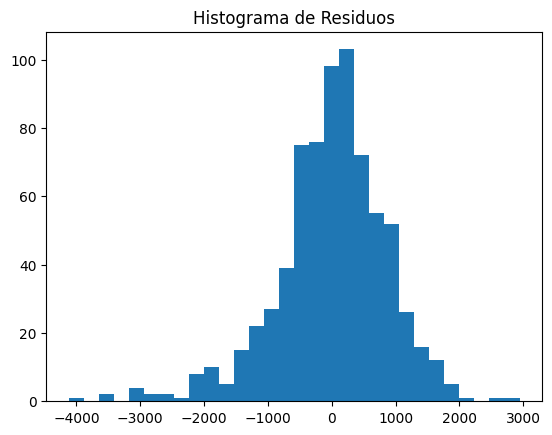

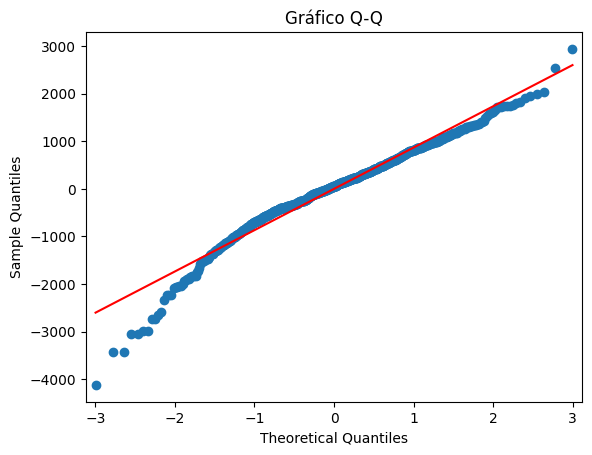

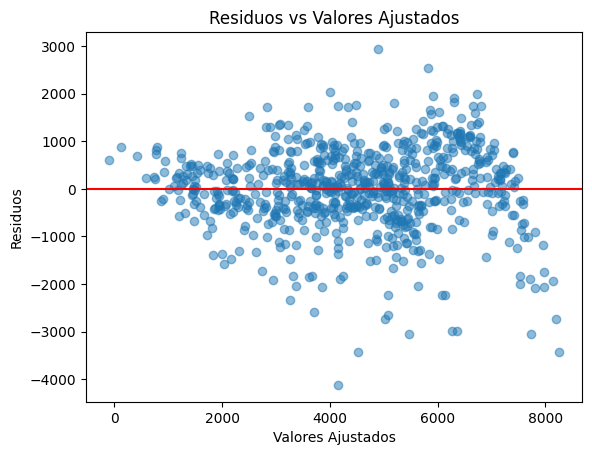

In [271]:
# Usando final_model como nombre del modelo
residuos = final_model.resid
valores_ajustados = final_model.fittedvalues

# Histograma de residuos
plt.hist(residuos, bins=30)
plt.title("Histograma de Residuos")
plt.show()

# Gráfico Q-Q
sm.qqplot(residuos, line='s')
plt.title("Gráfico Q-Q")
plt.show()

# Residuos vs. Valores Ajustados
plt.scatter(valores_ajustados, residuos, alpha=0.5)
plt.title("Residuos vs Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [272]:
from scipy.stats import kstest

# Residuos en la variable con el mismo nombre 
residuos_estandarizados = (residuos - residuos.mean()) / residuos.std()

# Aplicar KS test
resultado = kstest(residuos_estandarizados, 'norm')

display(resultado)


KstestResult(statistic=0.0699010360384984, pvalue=0.0014994213055341359, statistic_location=-0.5410073995637149, statistic_sign=-1)

In [273]:
resultado.pvalue < 0.05

True

In [274]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Modelo ajustado con el nombre final_model
residuos = final_model.resid
valores_ajustados = final_model.fittedvalues
variables_independientes = final_model.model.exog  # Esto recoge las variables independientes del modelo 

bp_test = het_breuschpagan(residuos, variables_independientes)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
result = dict(zip(labels, bp_test))

print(result)


{'LM Statistic': 70.9325540297948, 'LM-Test p-value': 2.92802452414378e-11, 'F-Statistic': 7.737306121253184, 'F-Test p-value': 7.801243778288495e-12}


### ¿Es un modelo adecuado estadísticamente? Justifique sus afirmaciones ###

A continuación compartimos los resultados de las pruebas
1. **Normalidad**:

Kolmogorov-Smirnov Test Result:
> `statistic=0.0699010360384979`

> `pvalue=0.0014994213055342896`

Interpretación:
Dado que el p-valor es significativo (0.0015 < 0.05), rechazamos la hipótesis nula (H0) y aceptamos la hipótesis alternativa (H1).

Decisión:
Los residuos **no siguen una distribución normal**.

2. **Homocedasticidad**:

Breusch-Pagan Test Result:
> `LM-Test p-value: 2.928024524144319e-11`

Interpretación:
Un p-valor muy pequeño (mucho menos de 0.05) sugiere que rechazamos la hipótesis nula (H0) en favor de la hipótesis alternativa (H1).

Decisión:
Los residuos presentan **heterocedasticidad**.

3. **Autocorrelación**:

Durbin-Watson statistic:
> `0.953` 

Interpretación:
Valores cercanos a 2 indican que no hay autocorrelación en los residuos. El valor 0.953, es menor a 2, lo que sugiere la presencia de autocorrelación positiva.

Decisión:
Los residuos están **correlacionados** (indicando que hay autocorrelación).

## Resumen:
> Los residuos **no son normales**.

> Los residuos presentan **heterocedasticidad**.

> Hay evidencia de **autocorrelación** en los residuos.



# Pregunta 6
Realice una predicción de arriendos de bicicletas para un día con las siguientes cualidades:
```python

import pandas as pd
pd.DataFrame({'season' : 2,
       'year' : 2021,
       'holiday' : 'feriado',
       'weekday' : 'Sábado',
       'workingday' : 'No laboral',
       'weather' : 'Niebla',
       'temp' : 12,
       'atemp' : 11,
       'humidity' : 66.3,
       'windspeed' : 12.5}, index = ['1'])

```


In [275]:
input_data = pd.DataFrame({
    'const': 1,
    'season': 2,
    'year': 1, # 2021
    'holiday': 1, # feriado
    'weekday': 6, # Sábado
    'workingday': 0, # No laboral
    'weather': 2, # Niebla
    'temp': 12,
    'atemp': 11,
    'humidity': 66.3,
    'windspeed': 12.5
}, index=[1])

prediction = final_model.predict(input_data)
print("Predicción de arriendos de bicicletas:", prediction[1])



Predicción de arriendos de bicicletas: 4136.596620165261


### Predicción ###
Predicción de arriendos de bicicletas: 4136.596620165274

# Pregunta 7
Cargue la base de datos Lluvia_full.csv, codifique la variable LluviaMan como 0 y 1 para los días sin lluvia y con lluvia respectivamente. Además, realice una separación de la base de datos en un set de entrenamiento y set de validación. Utilice una proporción de 80:20 respectivamente. Para poder replicar sus resultados, fije una semilla antes de obtener los indices. Para ello utilice la función random.seed(2023)

In [276]:
# Cargar base de datos
lluvias = pd.read_csv('data/Lluvia_full.csv')

In [277]:
lluvias.shape

(56420, 20)

In [278]:
lluvias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  object 
 17  LluviaMan    56420 non-null  object 
 18  Koppen       56420 non-null  object 
 19  Esta

In [279]:
display(lluvias.head())

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,No,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,No,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Yes,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,No,Temperate,Invierno


In [280]:
# Dummies variable LluviaMan
lluvia_manana = pd.get_dummies(lluvias['LluviaMan'], prefix='LluviaMan', drop_first = True, dtype = int)

In [281]:
display(lluvias.head())

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,No,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,No,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Yes,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,No,Temperate,Invierno


In [282]:
display(lluvia_manana.head())

,LluviaMan_Yes
0,0
1,0
2,0
3,1
4,0


In [283]:
lluvias = pd.concat([lluvias, lluvia_manana], axis=1)

In [284]:
lluvias.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,...,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion,LluviaMan_Yes
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,...,1015.4,1.0,1.0,9.4,18.8,No,No,Subtropical,Invierno,0
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,...,1015.2,1.0,1.0,11.9,17.9,No,No,Subtropical,Invierno,0
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,...,1015.5,7.0,7.0,8.1,12.2,No,No,Temperate,Invierno,0
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,...,1015.0,7.0,7.0,9.3,13.4,No,Yes,Temperate,Invierno,1
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,...,1015.3,7.0,7.0,9.0,11.7,No,No,Temperate,Invierno,0


In [285]:
lluvias = lluvias.drop('LluviaMan', axis=1)

In [286]:
lluvias.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,Koppen,Estacion,LluviaMan_Yes
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,Subtropical,Invierno,0
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,Subtropical,Invierno,0
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,Temperate,Invierno,0
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Temperate,Invierno,1
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,Temperate,Invierno,0


In [287]:
from sklearn.model_selection import train_test_split

In [288]:
X = lluvias.drop(['LluviaMan_Yes'], axis = 1)
y = lluvias['LluviaMan_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.20,
                                                   random_state = 2023)

In [289]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45136 entries, 31665 to 54103
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      45136 non-null  float64
 1   MaxTemp      45136 non-null  float64
 2   Lluvia       45136 non-null  float64
 3   Evaporacion  45136 non-null  float64
 4   Sol          45136 non-null  float64
 5   VelRafaga    45136 non-null  float64
 6   Vel9am       45136 non-null  float64
 7   Vel3pm       45136 non-null  float64
 8   Hum9am       45136 non-null  float64
 9   Hum3pm       45136 non-null  float64
 10  Pres9am      45136 non-null  float64
 11  Pre3pm       45136 non-null  float64
 12  Nub9am       45136 non-null  float64
 13  Nub3pm       45136 non-null  float64
 14  Temp9am      45136 non-null  float64
 15  Temp3pm      45136 non-null  float64
 16  LluviaHoy    45136 non-null  object 
 17  Koppen       45136 non-null  object 
 18  Estacion     45136 non-null  object 
dtypes: fl

In [290]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11284 entries, 14215 to 50157
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      11284 non-null  float64
 1   MaxTemp      11284 non-null  float64
 2   Lluvia       11284 non-null  float64
 3   Evaporacion  11284 non-null  float64
 4   Sol          11284 non-null  float64
 5   VelRafaga    11284 non-null  float64
 6   Vel9am       11284 non-null  float64
 7   Vel3pm       11284 non-null  float64
 8   Hum9am       11284 non-null  float64
 9   Hum3pm       11284 non-null  float64
 10  Pres9am      11284 non-null  float64
 11  Pre3pm       11284 non-null  float64
 12  Nub9am       11284 non-null  float64
 13  Nub3pm       11284 non-null  float64
 14  Temp9am      11284 non-null  float64
 15  Temp3pm      11284 non-null  float64
 16  LluviaHoy    11284 non-null  object 
 17  Koppen       11284 non-null  object 
 18  Estacion     11284 non-null  object 
dtypes: fl

In [291]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 45136 entries, 31665 to 54103
Series name: LluviaMan_Yes
Non-Null Count  Dtype
--------------  -----
45136 non-null  int64
dtypes: int64(1)
memory usage: 705.2 KB


In [292]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 11284 entries, 14215 to 50157
Series name: LluviaMan_Yes
Non-Null Count  Dtype
--------------  -----
11284 non-null  int64
dtypes: int64(1)
memory usage: 176.3 KB


# Pregunta 8
Realice un modelo de regresión logística para predecir si lloverá mañana utilizando la variable Evaporación, ¿es este Un factor significativo? Intérprete el odd ratio de la evaporación.

In [293]:
X_train_nvo = X_train[['Evaporacion']]

In [294]:
import statsmodels.api as sm
X_train_nvo = sm.add_constant(X_train_nvo)
model_logist = sm.Logit(y_train, X_train_nvo).fit()

Optimization terminated successfully.
         Current function value: 0.518724
         Iterations 6


In [295]:
print(model_logist.summary())

                           Logit Regression Results                           
Dep. Variable:          LluviaMan_Yes   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45134
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Aug 2023   Pseudo R-squ.:                 0.01814
Time:                        22:41:51   Log-Likelihood:                -23413.
converged:                       True   LL-Null:                       -23846.
Covariance Type:            nonrobust   LLR p-value:                3.527e-190
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7298      0.021    -34.448      0.000      -0.771      -0.688
Evaporacion    -0.1030      0.004    -27.765      0.000      -0.110      -0.096


In [296]:
import numpy as np

In [297]:
np.exp(model_logist.params)


const          0.482001
Evaporacion    0.902088
dtype: float64

### ¿Evaporación es un factor significativo? ###
La variable evaporación es un factor significativo para predecir la probabilidad de lluvia, lo cual sabemos por su pvalue menor a 0.05. 
Por otro lado, el odds ratio de la variable evaporación menor que 1 indica que al aumentar la evaporación disminuye las probabilidad de lluvia. Esto quiere decir que tienen una relación de dependencia negativa.

# Pregunta 9
Utilizando un método automatizado, ajuste un modelo de regresión logística, utilizando la metodología de dirección both (forward y backward a la vez).

In [298]:
from estyp.linear_model import LogisticRegression

In [299]:
from estyp.linear_model.stepwise import both_selection

In [300]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45136 entries, 31665 to 54103
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      45136 non-null  float64
 1   MaxTemp      45136 non-null  float64
 2   Lluvia       45136 non-null  float64
 3   Evaporacion  45136 non-null  float64
 4   Sol          45136 non-null  float64
 5   VelRafaga    45136 non-null  float64
 6   Vel9am       45136 non-null  float64
 7   Vel3pm       45136 non-null  float64
 8   Hum9am       45136 non-null  float64
 9   Hum3pm       45136 non-null  float64
 10  Pres9am      45136 non-null  float64
 11  Pre3pm       45136 non-null  float64
 12  Nub9am       45136 non-null  float64
 13  Nub3pm       45136 non-null  float64
 14  Temp9am      45136 non-null  float64
 15  Temp3pm      45136 non-null  float64
 16  LluviaHoy    45136 non-null  object 
 17  Koppen       45136 non-null  object 
 18  Estacion     45136 non-null  object 
dtypes: fl

In [301]:
lluvia_hoy_train = pd.get_dummies(X_train['LluviaHoy'], prefix='LluviaHoy', drop_first = True, dtype = int)
lluvia_hoy_test = pd.get_dummies(X_test['LluviaHoy'], prefix='LluviaHoy', drop_first = True, dtype = int)

lluvia_koppen_train = pd.get_dummies(X_train['Koppen'], prefix='Koppen', drop_first = True, dtype = int)
lluvia_koppen_test = pd.get_dummies(X_test['Koppen'], prefix='Koppen', drop_first = True, dtype = int)

lluvia_estacion_train = pd.get_dummies(X_train['Estacion'], prefix='Estacion', drop_first = True, dtype = int)
lluvia_estacion_test = pd.get_dummies(X_test['Estacion'], prefix='Estacion', drop_first = True, dtype = int)



In [302]:
X_train = pd.concat([X_train, lluvia_hoy_train], axis=1)
X_test = pd.concat([X_test, lluvia_hoy_test], axis=1)
X_train = pd.concat([X_train, lluvia_koppen_train], axis=1)
X_test = pd.concat([X_test, lluvia_koppen_test], axis=1)

X_train = pd.concat([X_train, lluvia_estacion_train], axis=1)
X_test = pd.concat([X_test, lluvia_estacion_test], axis=1)

In [303]:
X_train = X_train.drop('LluviaHoy', axis=1)
X_test = X_test.drop('LluviaHoy', axis=1)
X_train = X_train.drop('Koppen', axis=1)
X_test = X_test.drop('Koppen', axis=1)
X_train = X_train.drop('Estacion', axis=1)
X_test = X_test.drop('Estacion', axis=1)

In [304]:
df_train = pd.concat([X_train, y_train], axis = 1)

In [305]:
formula_todos = 'Evaporacion ~ ' + ' + '.join(X_train.columns) 
formula_todos

'Evaporacion ~ MinTemp + MaxTemp + Lluvia + Evaporacion + Sol + VelRafaga + Vel9am + Vel3pm + Hum9am + Hum3pm + Pres9am + Pre3pm + Nub9am + Nub3pm + Temp9am + Temp3pm + LluviaHoy_Yes + Koppen_Grassland + Koppen_Subtropical + Koppen_Temperate + Estacion_Otoño + Estacion_Primavera + Estacion_Verano'

In [309]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# Obtener el resumen del modelo
print(model_logist.summary())

# Interpretar el odd ratio de la evaporación
evaporacion_coef = model_logist.params['Evaporacion']
odds_ratio = np.exp(evaporacion_coef)
print(f"Coeficiente de Evaporación: {evaporacion_coef:.6f}")
print(f"Odds Ratio de Evaporación: {odds_ratio:.6f}")

                           Logit Regression Results                           
Dep. Variable:          LluviaMan_Yes   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45134
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Aug 2023   Pseudo R-squ.:                 0.01814
Time:                        22:47:15   Log-Likelihood:                -23413.
converged:                       True   LL-Null:                       -23846.
Covariance Type:            nonrobust   LLR p-value:                3.527e-190
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7298      0.021    -34.448      0.000      -0.771      -0.688
Evaporacion    -0.1030      0.004    -27.765      0.000      -0.110      -0.096
Coeficiente de Evaporación: -0.103043
Odds Ratio

In [320]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05):
    included = list(initial_list)
    while True:
        changed = False
        
        # Paso forward
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True

        # Paso backward
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)

        if not changed:
            break

    return included


# Pregunta 10
Considerando la base de entrenamiento, ajuste la curva ROC y KS asociada al modelo, ¿Qué puede concluir sobre la discriminación del modelo?. Con la información obtenida encuentre un punto de corte que tenga una sensibilidad mínima del 80% y la máxima especificidad.

In [318]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, auc

AUC: 0.8809816196612497
Threshold for Sensitivity >= 0.8: 0.21140713624541208


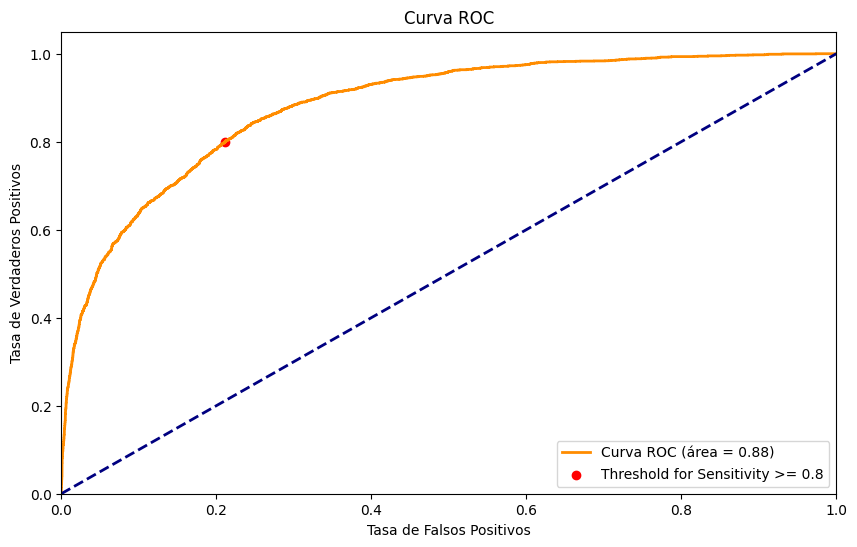

In [327]:
# Obtener las probabilidades predichas del conjunto de validación
y_probs = logisticRegr.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Encontrar threshold para sensibilidad >= 0.8
sensitivity = tpr
specificity = 1 - fpr
threshold_index = np.argmax(sensitivity >= 0.8)  # Find the index where sensitivity is >= 0.8
threshold = thresholds[threshold_index]

print("AUC:", roc_auc)
print("Threshold for Sensitivity >= 0.8:", threshold)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[threshold_index], tpr[threshold_index], color='red', label='Threshold for Sensitivity >= 0.8')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Al estar nuestra curva ROC aejada de la línea diagonal y un valor KS alto, concluímos que el modelo tiene una buena capacidad discriminatoria
